# What is torch.nn

In [66]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

In [67]:
PATH.mkdir(parents=True, exist_ok=True)


In [68]:
URL =  "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

In [69]:
if not (PATH / FILENAME).exists():
    content = requests.get(URL + FILENAME).content
    (PATH / FILENAME).open("wb").write(content)

In [70]:
import pickle
import gzip

In [71]:
with gzip.open((PATH/FILENAME).as_posix(),"rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

In [72]:
from matplotlib import pyplot
import numpy as np

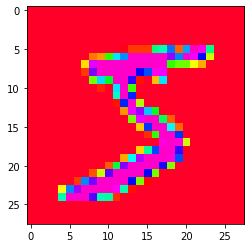

(50000, 784)


In [73]:
pyplot.imshow(x_train[0].reshape((28,28)), cmap="gist_rainbow")
try:
    import google.colab
except ImportError:
    pyplot.show()
print(x_train.shape)

In [50]:
import google.colab

ModuleNotFoundError: No module named 'google.colab'

In [143]:
import torch

x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)

n, c = x_train.shape
print(x_train.shape)
print(y_train.min(),y_train.max())

torch.Size([50000, 784])
tensor(0) tensor(9)


/tmp/ipykernel_12295/278970452.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train, y_train, x_valid, y_valid = map(


In [60]:
# neural network without nn

import math 

weights = torch.randn(784, 10) / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

In [61]:
def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
    return log_softmax(xb @ weights + bias)

In [62]:
bs = 64
xb = x_train[0:bs]
preds = model(xb)
preds[0], preds.shape

(tensor([-1.7251, -3.1498, -2.5067, -2.2222, -2.8446, -2.0885, -2.0584, -2.7389,
         -2.1119, -2.3672], grad_fn=<SelectBackward0>),
 torch.Size([64, 10]))

In [63]:
xb.shape

torch.Size([64, 784])

In [17]:
def nll(input, target):
    return - input[range(target.shape[0]), target].mean()
loss_func = nll

In [18]:
yb = y_train[0:bs]
print(loss_func(preds, yb))

tensor(2.2804, grad_fn=<NegBackward0>)


In [19]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

In [20]:
print(accuracy(preds, yb))

tensor(0.1562)


In [21]:
from IPython.core.debugger import set_trace

lr = 0.5  # learning rate
epochs = 2  # how many epochs to train for

for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
#         set_trace()
        start_i = i * bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * lr
            bias -= bias.grad * lr
            weights.grad.zero_()
            bias.grad.zero_()

In [22]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor(0.0819, grad_fn=<NegBackward0>) tensor(1.)


In [125]:
# with nn
from torch import nn

In [144]:
yb = y_train[0:bs]
xb = x_train[0:bs]

In [76]:
xb,yb

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
         1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
         9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0]))

In [145]:
import torch.nn.functional as F
loss_func = F.cross_entropy


In [ ]:
def model(xb):
    return xb@weights + bias

In [78]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor(2.2478, grad_fn=<NllLossBackward0>) tensor(0.1875)


In [92]:
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(784, 10) / math.sqrt(784))
        self.bias = nn.Parameter(torch.zeros(10))
        
    def forward(self, xb):
        return xb @ self.weights + self.bias

In [93]:
model = Mnist_Logistic()

In [82]:
print(loss_func(model(xb), yb))

tensor(2.2478, grad_fn=<NllLossBackward0>)


In [94]:
xb.shape, yb.shape

(torch.Size([64, 784]), torch.Size([64]))

In [84]:
# with torch.no_grad():
#     weights -= weights.grad * lr
#     bias -= bias.grad * lr
#     weights.grad.zero_()
#     bias.grad.zero_()

In [96]:
model

Mnist_Logistic()

In [97]:
with torch.no_grad():
    for p in model.parameters():
        print(p)
    model.zero_grad()

Parameter containing:
tensor([[-0.0257,  0.0205,  0.0395,  ..., -0.0058, -0.0009,  0.0038],
        [ 0.0038,  0.0112,  0.0102,  ...,  0.0541,  0.0252,  0.0496],
        [-0.0202,  0.0218, -0.0016,  ..., -0.0605,  0.0372,  0.0219],
        ...,
        [ 0.0449, -0.0226, -0.0198,  ...,  0.0146,  0.0165,  0.0038],
        [ 0.0425,  0.0042,  0.0059,  ...,  0.0228, -0.0875,  0.0024],
        [ 0.0204, -0.0028,  0.0078,  ...,  0.0205,  0.0123, -0.0581]],
       requires_grad=True)
Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)


In [146]:
n,c = x_train.shape
n,c

(50000, 784)

In [147]:
bs

64

In [148]:
lr = 0.5  # learning rate
epochs = 10  # how many epochs to train for

In [149]:
loss_func

<function torch.nn.functional.cross_entropy(input: torch.Tensor, target: torch.Tensor, weight: Optional[torch.Tensor] = None, size_average: Optional[bool] = None, ignore_index: int = -100, reduce: Optional[bool] = None, reduction: str = 'mean', label_smoothing: float = 0.0) -> torch.Tensor>

In [111]:
def fit():
    for epoch in range(epochs):
        for i in range((n-1) // bs + 1): # mini batch
            start_i = i * bs
            end_i = start_i + bs
            xb = x_train[start_i: end_i]
            yb = y_train[start_i: end_i]
            pred = model(xb)
            loss = loss_func(pred, yb)
            
            loss.backward()
            with torch.no_grad():
                for p in model.parameters():
                    p -= p.grad * lr
                model.zero_grad()

In [112]:
fit()

In [150]:
loss_func(model(xb), yb)

tensor(2.2917, grad_fn=<NllLossBackward0>)

In [151]:
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10)
        
    def forward(self, xb):
        return self.lin(xb)

In [152]:
model = Mnist_Logistic()
print(loss_func(model(xb), yb))

tensor(2.2216, grad_fn=<NllLossBackward0>)


In [116]:
fit()
print(loss_func(model(xb), yb))

tensor(0.1658, grad_fn=<NllLossBackward0>)


In [153]:
model = Mnist_Logistic()

In [154]:
model

Mnist_Logistic(
  (lin): Linear(in_features=784, out_features=10, bias=True)
)

In [155]:
for p in model.parameters():
    print(p)

Parameter containing:
tensor([[-0.0122,  0.0356,  0.0319,  ..., -0.0061, -0.0240, -0.0336],
        [-0.0106, -0.0163, -0.0315,  ..., -0.0327,  0.0217, -0.0035],
        [-0.0164,  0.0109, -0.0079,  ..., -0.0057, -0.0017,  0.0212],
        ...,
        [ 0.0324,  0.0253,  0.0346,  ..., -0.0140,  0.0255, -0.0025],
        [ 0.0310,  0.0030,  0.0083,  ...,  0.0310,  0.0211,  0.0121],
        [ 0.0174, -0.0211,  0.0290,  ...,  0.0170,  0.0021,  0.0083]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0134,  0.0027,  0.0310, -0.0330,  0.0002, -0.0081,  0.0236, -0.0183,
         0.0108, -0.0024], requires_grad=True)


In [156]:
with torch.no_grad():
    for p in model.parameters():
#         p -= p.grad * lr
        print(p.grad)
    model.zero_grad()

None
None
